In [11]:
import os

In [42]:
datapath = './datasets/flower_photos/'

In [43]:
folders = os.listdir(datapath)
folders

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [48]:
for folder in folders:
    print(folder, end = " ")
    #print(os.listdir(datapath+folder))
    print(len((os.listdir(datapath+folder))))
  

daisy 633
dandelion 898
roses 641
sunflowers 699
tulips 799


In [73]:
import pathlib
import matplotlib.pyplot as plt

In [53]:
data_dir = pathlib.Path(datapath)
data_dir

WindowsPath('datasets/flower_photos')

In [68]:
print(len(list(data_dir.glob('*/')))) # five folders

5


In [70]:
print(len(list(data_dir.glob('*/*')))) # 3670 images in total

3670


In [78]:
roses = list(data_dir.glob('roses/*'))

In [82]:
# to display particular image
import PIL

In [81]:
print(type(roses[0]))

<class 'pathlib.WindowsPath'>


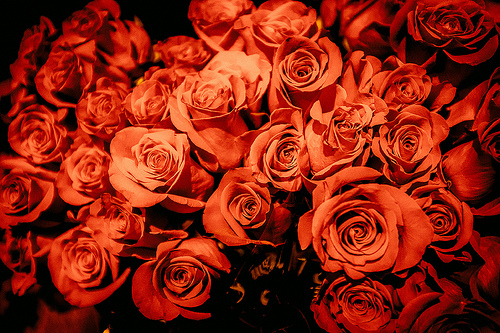

In [83]:
PIL.Image.open(str(roses[2]))

In [86]:
print(roses[0])
img_path = roses[0]

datasets\flower_photos\roses\10090824183_d02c613f10_m.jpg


In [120]:
flower_images_dict ={
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflower':list(data_dir.glob('sunflower/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

flower_labels_dict ={
    'roses' : 0,
    'daisy' : 1,
    'dandelion': 2,
    'sunflower': 3,
    'tulips':4,
}

In [121]:
import cv2

In [122]:
img = cv2.imread(str(flower_images_dict['roses'][0]))

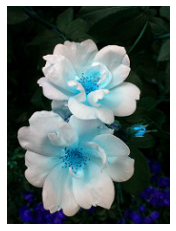

In [123]:
plt.axis('off')
plt.imshow(img) # display image with matplotlib
plt.show()

#### Reshaping all Images

In [212]:
X,y = [],[]

for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        # converting into grayscale (not need but for space)
        #resized_img = cv2.cvtColor(resized_img,cv2.COLOR_BGR2GRAY)
        X.append(resized_img)
        y.append(flower_labels_dict[flower_name])

In [213]:
X[1].shape #(180, 180, 3) without grapyscaled, now 180,180

(180, 180, 3)

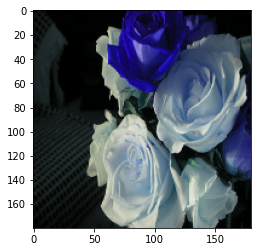

In [214]:
plt.imshow(X[1])

In [215]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

##### Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.
#### Kernel: In image processing kernel is a convolution matrix or masks which can be used for blurring, sharpening, embossing, edge detection, and more by doing a convolution between a kernel and an image.
**keras.layers.Conv2D(filters, kernel_size, strides=(1, 1),
  padding='valid', data_format=None, dilation_rate=(1, 1),
  activation=None, use_bias=True, kernel_initializer='glorot_uniform',
  bias_initializer='zeros', kernel_regularizer=None,
  bias_regularizer=None, activity_regularizer=None,
  kernel_constraint=None, bias_constraint=None)**

In [216]:
model = Sequential() # model object of class Sequential

In [217]:
num_classes = 5
model = Sequential([
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer = 'adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics = ['accuracy'])
model.fit(X_train_scaled,Y_train,epochs = 20)

Epoch 1/20


ValueError: in user code:

    C:\Users\dell\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\dell\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\dell\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\dell\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\dell\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\dell\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\dell\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\dell\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\dell\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_13 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [None, 180, 180]


In [ ]:
import numpy as np
X = np.array(X)
Y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,random_state = 4)

In [ ]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy']) # important step
# improved accuracy after scaling
model.fit(X_train, Y_train, epochs = 5)